# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
#from api_keys import weather_api_key
weather_api_key = "<removed + access deleted>"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [18]:
#Finding DIR of this .ipynb to set the path of the ChatGPT suggestion ... 
import os
from pathlib import Path

__file__ = "WeatherPy.ipynb"
script_abs_path = os.path.abspath(__file__)   #FINDS => Full FILEPATH to this EXACT ".py" or ".ipynb" file .... 
print(script_abs_path)
script_dir_name = os.path.dirname(script_abs_path)  #FINDS => PARENT FOLDER ... this EXACT ".py" or ".ipynb" file ....
print(script_dir_name)
print("-----")
os.chdir(script_dir_name)

#Confirm actual Current Directory for Building out Path.
validated_current_dir = os.getcwd()
print(f"The now Validated .py script's current location is:\n{validated_current_dir}")
print("\n-+-+-+-+-+-")

c:\Users\Aolda\onedrive\desktop\SCS_Modules_ToGitHub\python-api-challenge\WeatherPy\WeatherPy.ipynb
c:\Users\Aolda\onedrive\desktop\SCS_Modules_ToGitHub\python-api-challenge\WeatherPy
-----
The now Validated .py script's current location is:
c:\Users\Aolda\onedrive\desktop\SCS_Modules_ToGitHub\python-api-challenge\WeatherPy

-+-+-+-+-+-


In [19]:
#Filler cell

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

In [21]:
print(cities)

['vilyuchinsk', 'preobrazheniye', 'usinsk', 'ushuaia', 'edinburgh of the seven seas', 'fortaleza', 'port-aux-francais', 'yellowknife', 'pesqueira', 'papatowai', 'west island', 'waitangi', "'anah", 'stanley', 'karamay', 'san patricio', 'aykhal', 'invercargill', 'sabang', 'bayji', 'avarua', 'fale old settlement', 'pandan', 'new plymouth', 'udachny', 'urumqi', 'nemuro', 'sinop', 'burao', 'urucara', 'buka', 'gadzhiyevo', 'warangal', 'grytviken', 'val-des-monts', 'blackmans bay', 'tombodu', 'bredasdorp', 'taiohae', 'bethel', 'atafu village', 'talnakh', 'tazacorte', 'laguna', 'luderitz', 'tilcara', 'hermanus', 'vicente guerrero', 'pearsall', 'tura', 'albany', 'puerto natales', 'sri dungargarh', 'vilyuysk', 'chonchi', 'mejit', 'adamstown', 'kosh-agach', 'amahai', 'tiksi', 'ibresi', 'thompson', 'praia da vitoria', 'shevchenko', 'hawaiian paradise park', 'qaqortoq', 'ilulissat', 'lazaro cardenas', 'whitehorse', 'tindouf', 'batang', 'chinde', 'kavieng', 'arno', 'saipan', 'hadibu', 'carnarvon', '

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="   # YOUR CODE HERE
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters + url place holders/compilers ...
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for idx, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (idx % 50 == 0 and idx >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}" #f"{url}{city}&units={units}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        
        # Append the City information into city_data list
        city_data.append({
                          "City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}
                          )

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
{'coord': {'lon': 158.4028, 'lat': 52.9306}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 0.53, 'feels_like': -4.52, 'temp_min': 0.52, 'temp_max': 3.15, 'pressure': 959, 'humidity': 92, 'sea_level': 959, 'grnd_level': 958}, 'visibility': 2163, 'wind': {'speed': 5.48, 'deg': 287, 'gust': 7.59}, 'snow': {'1h': 0.57}, 'clouds': {'all': 100}, 'dt': 1700414139, 'sys': {'type': 2, 'id': 2088272, 'country': 'RU', 'sunrise': 1700427439, 'sunset': 1700457998}, 'timezone': 43200, 'id': 2118647, 'name': 'Vilyuchinsk', 'cod': 200}
Processing Record 2 of Set 1 | preobrazheniye
{'coord': {'lon': 133.9064, 'lat': 42.9019}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -0.73, 'feels_like': -5.55, 'temp_min': -0.73, 'temp_max': -0.73, 'pressure': 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,3.15,92,100,5.48,RU,1700414139
1,preobrazheniye,42.9019,133.9064,-0.73,69,27,4.55,RU,1700414133
2,usinsk,65.9939,57.5281,-12.18,96,96,4.02,RU,1700414328
3,ushuaia,-54.8000,-68.3000,3.81,70,75,8.23,AR,1700414045
4,edinburgh of the seven seas,-37.0676,-12.3116,12.68,70,49,11.38,SH,1700414328


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,3.15,92,100,5.48,RU,1700414139
1,preobrazheniye,42.9019,133.9064,-0.73,69,27,4.55,RU,1700414133
2,usinsk,65.9939,57.5281,-12.18,96,96,4.02,RU,1700414328
3,ushuaia,-54.8000,-68.3000,3.81,70,75,8.23,AR,1700414045
4,edinburgh of the seven seas,-37.0676,-12.3116,12.68,70,49,11.38,SH,1700414328


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

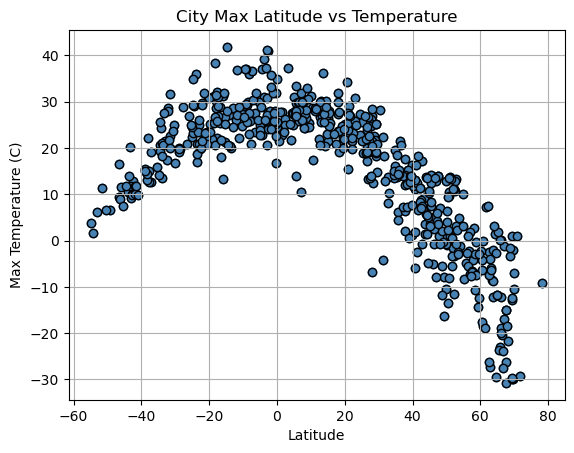

In [28]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

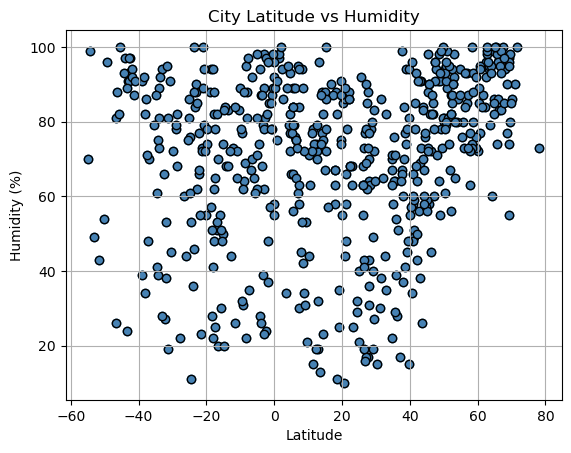

In [29]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

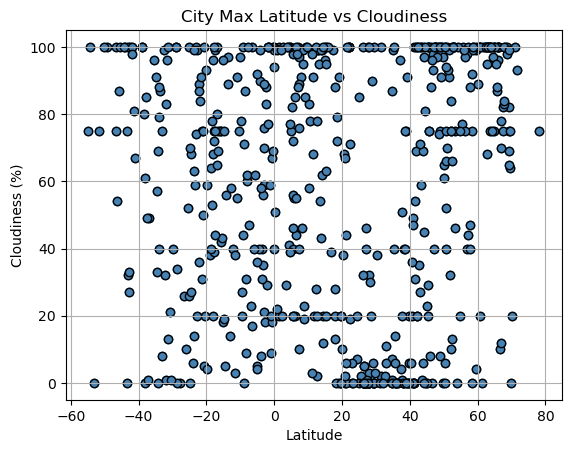

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

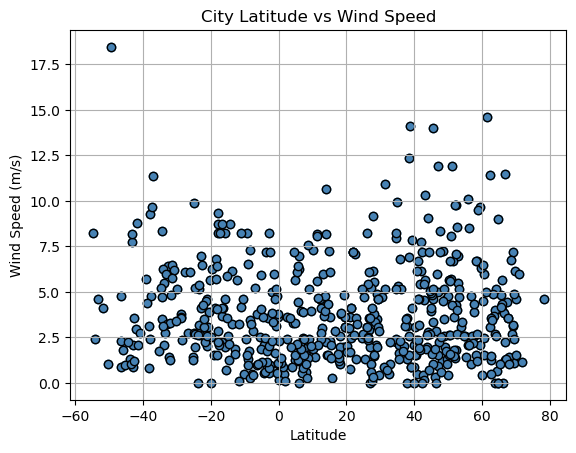

In [31]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots

def Linear_Regression(x_values,y_values):
# Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
    plt.scatter(x_values,y_values) 
# Plot regression line
    plt.plot(x_values,regress_values,"r-")
    #change x_label location according x_values range
    x_label = min(x_values) + (max(x_values) - min(x_values)) * 0.05
    #change y_label location according y_values range
    y_label = min(y_values) + (max(y_values) - min(y_values)) * 0.05
    plt.annotate(line_eq,(x_label,y_label),fontsize=15,color="red")
# Print r square value
    print(f"The r-value is:{rvalue}")

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,3.15,92,100,5.48,RU,1700414139
1,preobrazheniye,42.9019,133.9064,-0.73,69,27,4.55,RU,1700414133
2,usinsk,65.9939,57.5281,-12.18,96,96,4.02,RU,1700414328
7,yellowknife,62.4560,-114.3525,-2.55,96,100,3.09,CA,1700414262
12,stanley,54.8680,-1.6985,10.01,94,20,2.57,GB,1700414330


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,3.81,70,75,8.23,AR,1700414045
4,edinburgh of the seven seas,-37.0676,-12.3116,12.68,70,49,11.38,SH,1700414328
5,fortaleza,-3.7227,-38.5247,31.07,68,40,7.20,BR,1700414328
6,port-aux-francais,-49.3500,70.2167,6.61,96,100,18.46,TF,1700414098
8,pesqueira,-8.3578,-36.6964,36.03,22,9,3.45,BR,1700414329


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8806899150842571


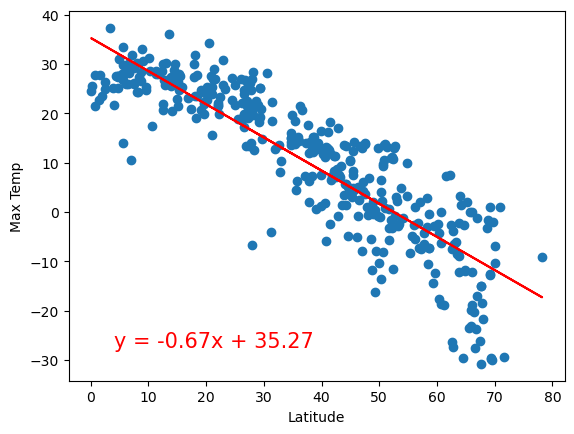

In [35]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
Regression = Linear_Regression(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show plot
plt.show()

The r-value is:0.7336081860029817


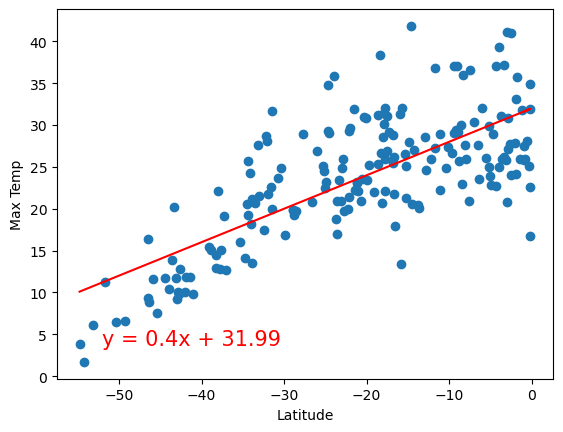

In [36]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show plot
plt.show()

**Discussion about the linear relationship:** 

From the prior plots we can observe that there is a strong linear correlation between the latitude and temperature of a city. These observations can be expected since the tempeature is hotter closer to the equator and it gets colder the farther away the latitude is from it.

The plots indicate that as the latitude of the city's location increased:
- In the northern hemisphere (IE: further from the equator), the temperature decreases, having a strong positive correlation.
- In the southern hemisphere (IE: closer to the equator), the temperature increases, having a strong negative correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.32931798116315886


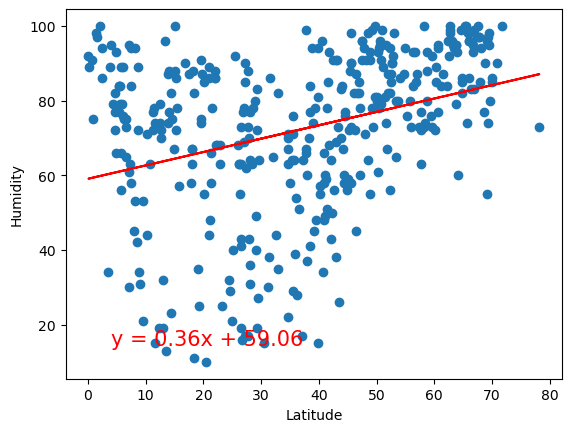

In [37]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

The r-value is:-0.07033536982341206


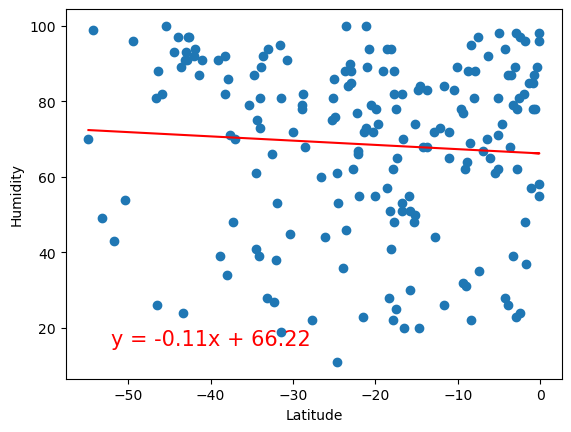

In [38]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

**Discussion about the linear relationship:** 

From the prior plots we can observe that there is a weaker linear correlation between the latitude and humidity of a city. With the northern hemisphere providing more correlation strength than the south.

The plots indicate that as the latitude of the city's location increased:
- In the northern hemisphere (IE: further from the equator), the humidity increases, having a weak positive correlation.
- In the southern hemisphere (IE: closer to the equator), the humidity decreases, having a very weak negative correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.19827749073466017


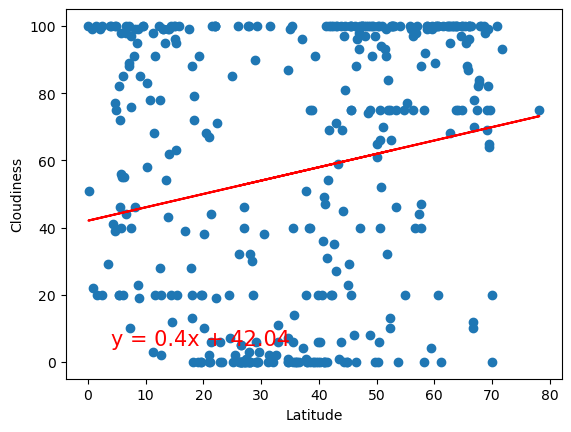

In [39]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

The r-value is:-0.10452048350486122


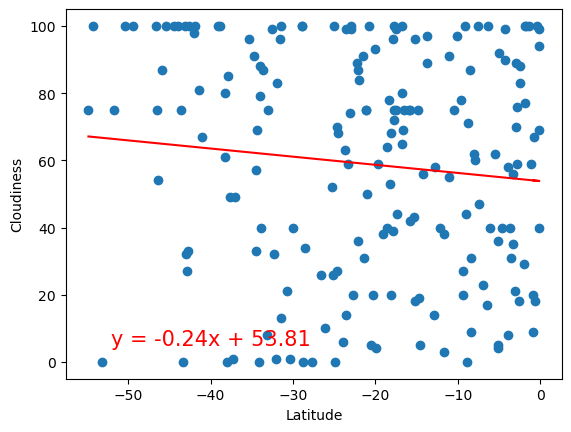

In [40]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

**Discussion about the linear relationship:** 

From the prior plots we can observe that there is a weaker linear correlation between the latitude and cloudiness of a city. With the northern hemisphere providing more correlation strength than the south.

The plots indicate that as the latitude of the city's location increased:
- In the northern hemisphere (IE: further from the equator), the cloudiness increases, having a moderate positive correlation.
- In the southern hemisphere (IE: closer to the equator), the cloudiness decreases, having a very weak negative correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.12878892859500377


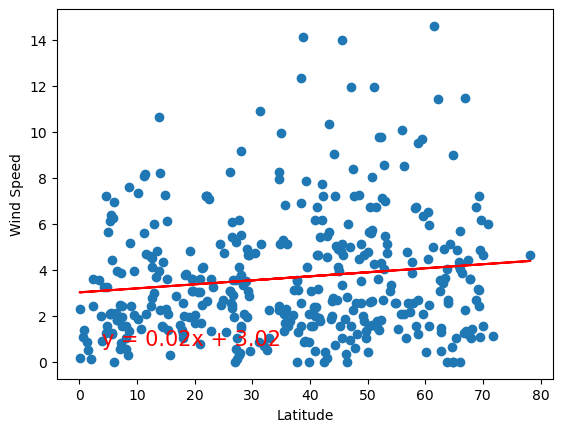

In [41]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show plot
plt.show()

The r-value is:-0.1849136306899292


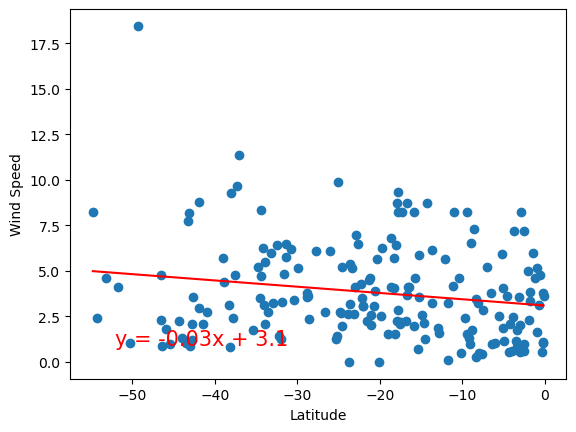

In [42]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show plot
plt.show()

**Discussion about the linear relationship:** 

From the prior plots we can observe that there is a weaker linear correlation between the latitude and wind speed of a city. With the both hemispheres providing very weak correlation strength based on the locations latitude.

The plots indicate that as the latitude of the city's location increased:
- In the northern hemisphere (IE: further from the equator), the wind speed increases, having a very weak positive correlation.
- In the southern hemisphere (IE: closer to the equator), the wind speed decreases, having a very weak negative correlation.